# Fraud Detection Analysis

Task:

1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?


### Note: Answers at the end of this file

## 1) Data cleaning including missing values, outliers and multi-collinearity.

In [32]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv(r"C:\Users\Rahul\Desktop\Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
# Columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
# Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Checking null values

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# Complete stats on the dataset

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
data['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

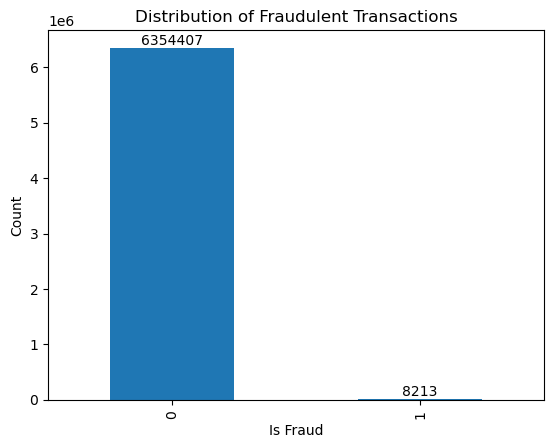

In [10]:
isFraud_count = data['isFraud'].value_counts()
isFraud_count.plot(kind='bar')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')

for i, count in enumerate(isFraud_count):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

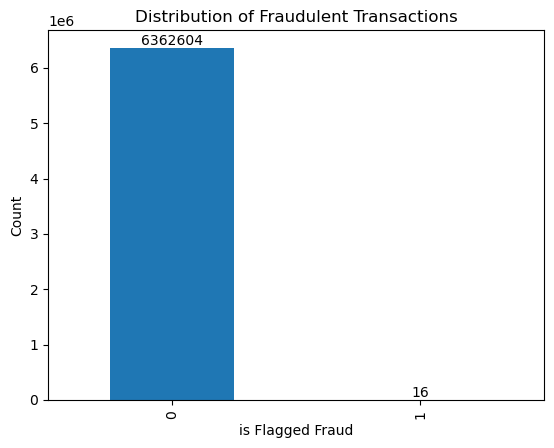

In [11]:
isFlaggedFraud_count = data['isFlaggedFraud'].value_counts()
isFlaggedFraud_count.plot(kind='bar')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('is Flagged Fraud')
plt.ylabel('Count')

for i, count in enumerate(isFlaggedFraud_count):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

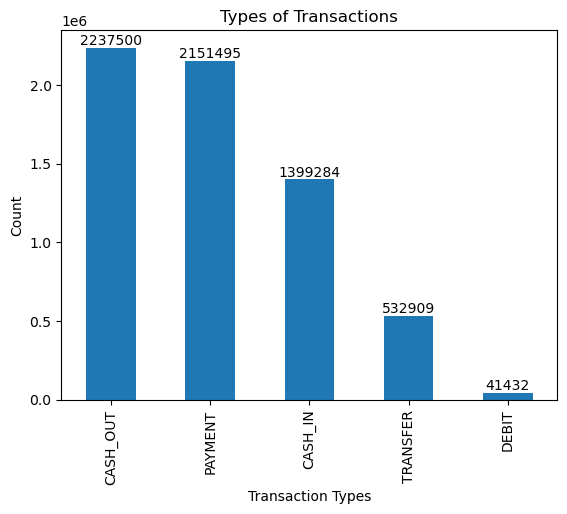

In [12]:
type_count = data['type'].value_counts()
type_count.plot(kind='bar')
plt.title('Types of Transactions')
plt.xlabel('Transaction Types')
plt.ylabel('Count')

for i, count in enumerate(type_count):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [13]:
# Removing outliers based on IQR

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

step              1.790000e+02
amount            1.953319e+05
oldbalanceOrg     1.073152e+05
newbalanceOrig    1.442584e+05
oldbalanceDest    9.430367e+05
newbalanceDest    1.111909e+06
isFraud           0.000000e+00
isFlaggedFraud    0.000000e+00
dtype: float64

In [14]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
outliers = (data < lower_bound) | (data > upper_bound)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_15076\4003195952.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


In [16]:
outliers

,amount,isFlaggedFraud,isFraud,nameDest,nameOrig,newbalanceDest,newbalanceOrig,oldbalanceDest,oldbalanceOrg,step,type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,True,False,False,False,False,False,True,True,False
6362616,True,False,True,False,False,False,False,False,True,True,False
6362617,True,False,True,False,False,True,False,False,True,True,False
6362618,True,False,True,False,False,False,False,False,True,True,False


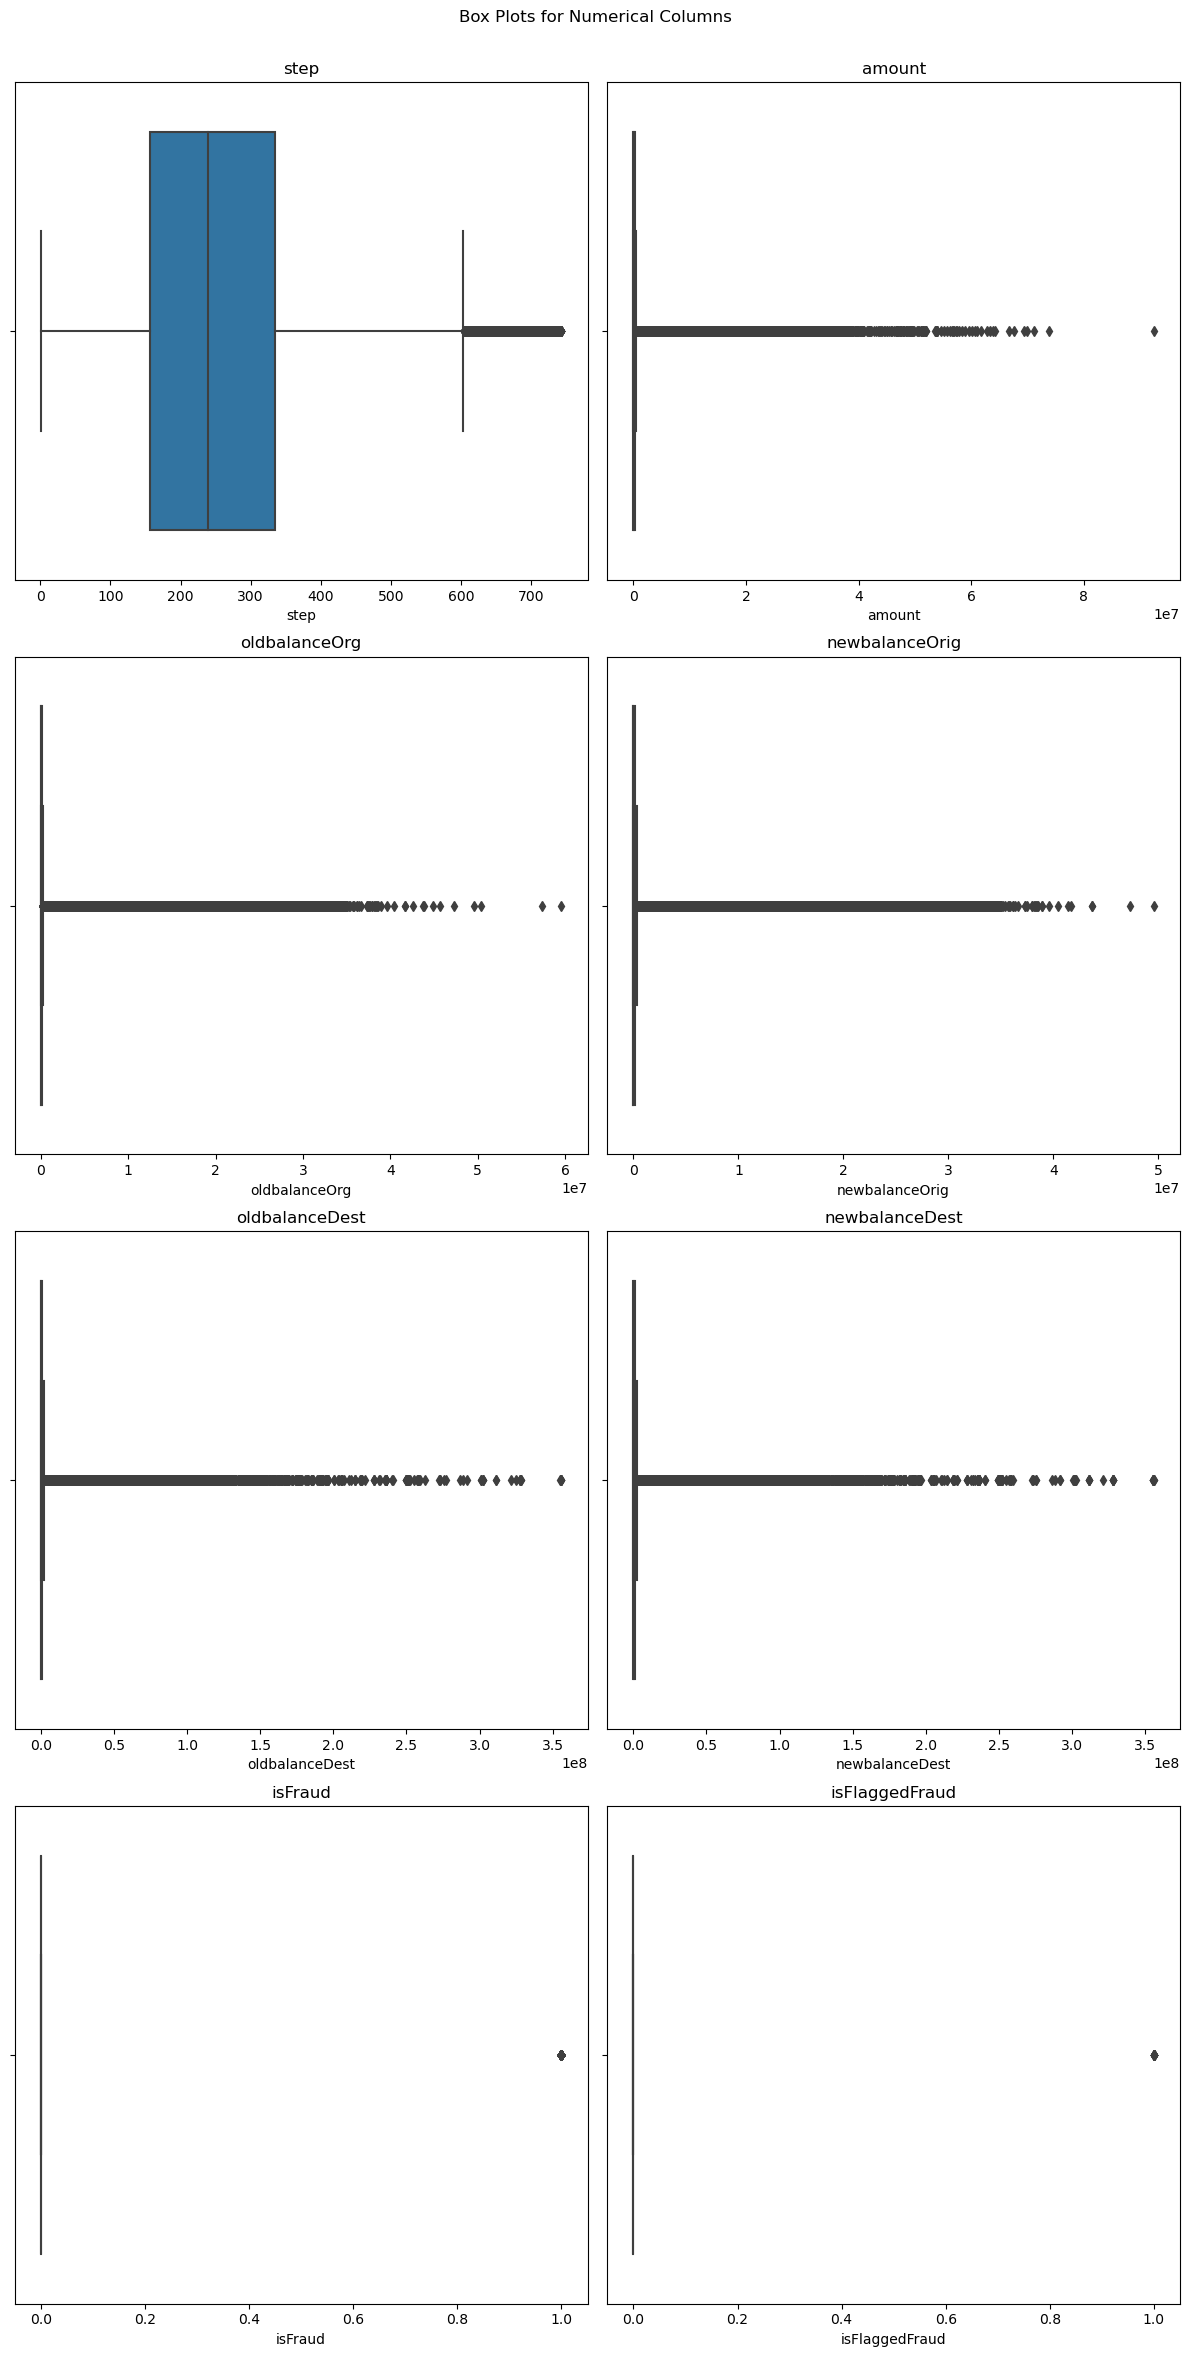

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['float64','int64']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['float64','int64']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()

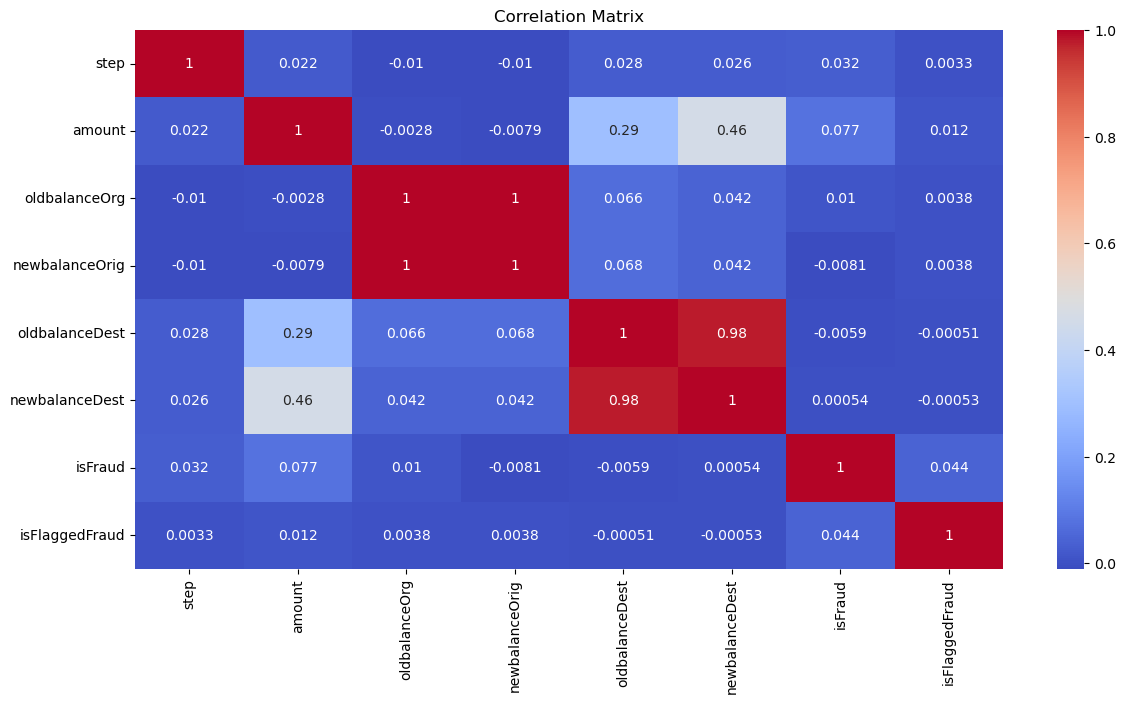

In [18]:
# Checking multi-collinearity using correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [19]:
data1 = pd.read_csv(r'C:\Users\Rahul\Desktop\Fraud.csv')

In [20]:
data1['customer_info_Orig'] = data1['nameOrig'].apply(lambda x: 1 if x.startswith('C') else (0 if x.startswith('M') else None))
data1['customer_info_Dest'] = data1['nameDest'].apply(lambda x: 1 if x.startswith('C') else (0 if x.startswith('M') else None))
data1.drop(['customer_info_Orig'],axis=1,inplace = True)

In [21]:
def flag_suspicious(transaction):
    if (transaction['newbalanceOrig'] == 0 or
            transaction['newbalanceDest'] == transaction['oldbalanceDest']):
        return 1
    else:
        return 0
    
data1['isSuspicious'] = data1.apply(flag_suspicious, axis=1)
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,customer_info_Dest,isSuspicious
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1,1


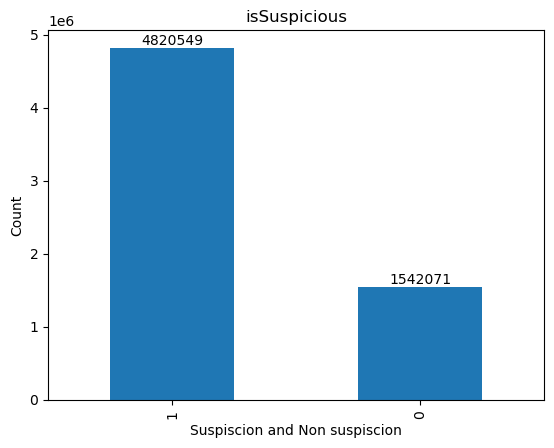

In [22]:
type_count = data1['isSuspicious'].value_counts()
type_count.plot(kind='bar')
plt.title('isSuspicious')
plt.xlabel('Suspiscion and Non suspiscion')
plt.ylabel('Count')

for i, count in enumerate(type_count):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [23]:
type_mapping = {
    'PAYMENT': 1,
    'TRANSFER': 2,
    'CASH_OUT': 3,
    'CASH_IN': 4,
    'DEBIT': 5
}

# Create a new column 'type_numeric' using the mapping
data1['type_numeric'] = data1['type'].map(type_mapping)

# Display the DataFrame with the new column
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,customer_info_Dest,isSuspicious,type_numeric
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,1,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,1,2
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,1,3
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,1,3
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1,1,2
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,1,3
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1,1,2


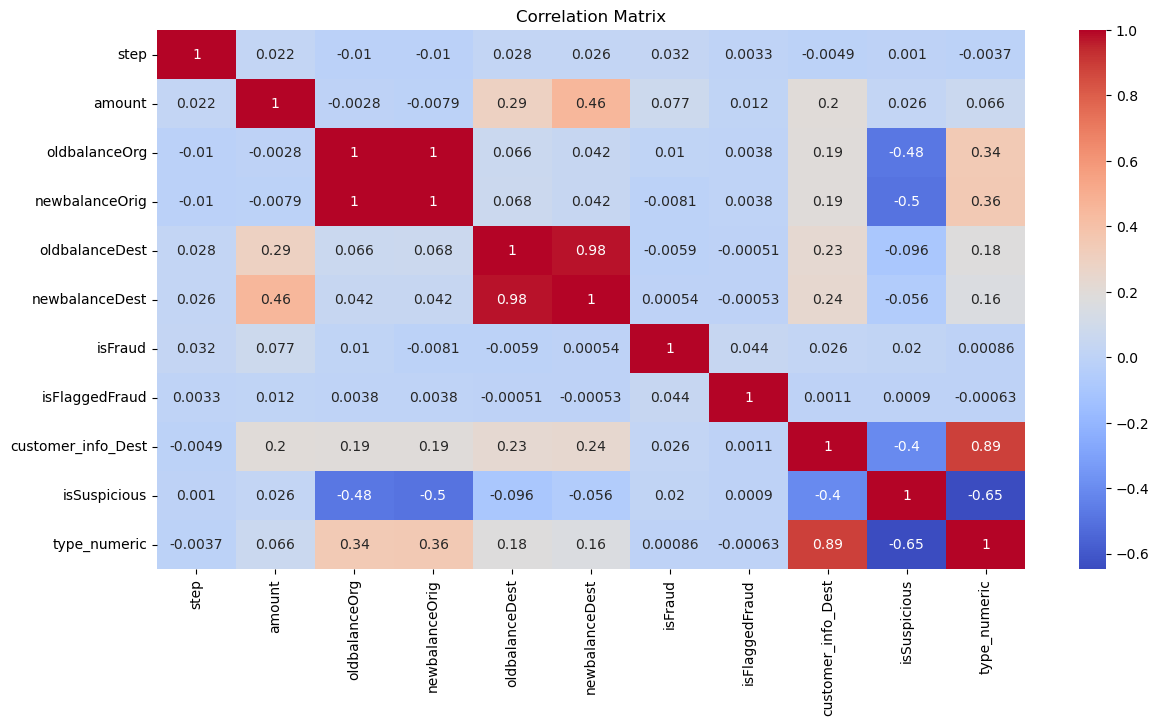

In [24]:
corr_matrix = data1.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [25]:
threshold = 0.9
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            corr_features.add(corr_matrix.columns[i])

print("\nHighly correlated features to drop:", corr_features)


Highly correlated features to drop: {'newbalanceOrig', 'newbalanceDest'}


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = data1.select_dtypes(include=[np.number]).drop(columns=['isFraud', 'isFlaggedFraud','customer_info_Dest','isSuspicious','type_numeric'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,step,1.188495
1,amount,4.011315
2,oldbalanceOrg,465.122355
3,newbalanceOrig,466.903890
4,oldbalanceDest,71.765327
5,newbalanceDest,83.231611


In [27]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Features and target
X = data1[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'customer_info_Dest', 'isSuspicious','type_numeric']]
y = data1['isFraud']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Evaluate models
print("Ridge Model Score:", ridge_model.score(X_test, y_test))
print("Lasso Model Score:", lasso_model.score(X_test, y_test))


Ridge Model Score: 0.16001267652677953
Lasso Model Score: -3.8762264797931323e-07


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Features and target
X = data1[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'customer_info_Dest', 'isSuspicious','type_numeric']]
y = data1['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Performance:
Accuracy: 0.999689855227354
ROC AUC Score: 0.8919744758894046
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906285      66]
 [    526    1909]]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features and target
X = data1[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'customer_info_Dest', 'isSuspicious','type_numeric']]
y = data1['isFraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.9992791229608767
ROC AUC Score: 0.7318091557174352
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.94      0.46      0.62      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.73      0.81   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906281      70]
 [   1306    1129]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Decision Tree Performance:
Accuracy: 0.9996961419457184
ROC AUC Score: 0.9344284645284845
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.87      0.88      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906090     261]
 [    319    2116]]


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Gradient Boosting Performance:
Accuracy: 0.9990522772065595
ROC AUC Score: 0.6484345176572578
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.30      0.44      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.65      0.72   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906254      97]
 [   1712     723]]


In [ ]:
from sklearn.svm import SVC

# Train a Support Vector Classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nSupport Vector Machine Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Features and target
X = data1[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
           'isFlaggedFraud', 'customer_info_Dest', 'isSuspicious', 'type_numeric']]
y = data1['isFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the Conv1D input shape (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Build the CNN model
model = Sequential()

# Convolutional layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))

# Pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another convolutional layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
print("\nCNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/2
111346/111346 - 507s - loss: 0.0109 - accuracy: 0.9991 - val_loss: 0.0059 - val_accuracy: 0.9992 - 507s/epoch - 5ms/step
Epoch 2/2
111346/111346 - 523s - loss: 0.0096 - accuracy: 0.9992 - val_loss: 0.0058 - val_accuracy: 0.9992 - 523s/epoch - 5ms/step
59650/59650 [==============================] - 162s 3ms/step

CNN Model Performance:
Accuracy: 0.9992414026506901
ROC AUC Score: 0.7032846341010024
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       1.00      0.41      0.58      2435

    accuracy                           1.00   1908786
   macro avg       1.00      0.70      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906348       3]
 [   1445     990]]



Feature Importance:
oldbalanceOrg: 0.3101
newbalanceDest: 0.2125
type_numeric: 0.1372
amount: 0.1211
step: 0.1031
oldbalanceDest: 0.0668
newbalanceOrig: 0.0395
isSuspicious: 0.0066
customer_info_Dest: 0.0028
isFlaggedFraud: 0.0004


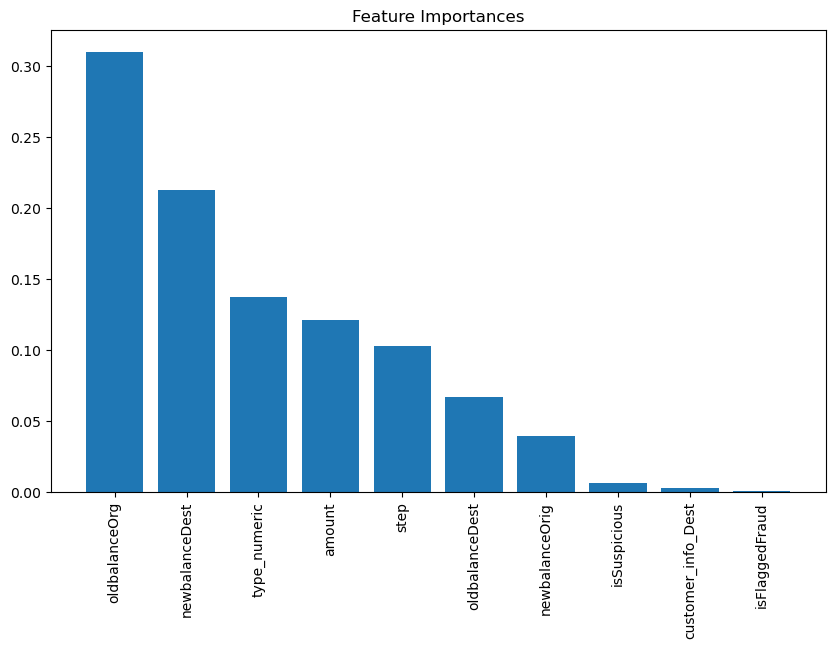

In [35]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

print("\nFeature Importance:")
for i in range(X.shape[1]):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

## 2. Describe your fraud detection model in elaboration.

### Fraud Detection Model Description

#### Data Collection and Preparation
The development of our fraud detection model began with a meticulous **data collection and preparation** phase. We gathered comprehensive transactional data, including attributes such as transaction type, amount, account balances, and indicators for potential fraud. The dataset encompassed details like `step`, `type`, `amount`, `nameOrig`, `oldbalanceOrg`, `newbalanceOrig`, `nameDest`, `oldbalanceDest`, `newbalanceDest`, `isFraud`, and `isFlaggedFraud`. To prepare this data for analysis, we undertook several crucial steps: addressing missing values and correcting errors, normalizing numerical features (such as `amount` and balances) to ensure consistency, encoding categorical variables (like `type`) to make them suitable for modeling, and generating new features that might capture additional patterns indicative of fraud. The objective was to ensure the data was clean, reliable, and ready for effective feature engineering.

#### Feature Engineering
In the **feature engineering** phase, we enhanced the model's capability by focusing on the selection and creation of relevant features. Initial feature selection was informed by domain expertise, emphasizing attributes like transaction amount and type, which are central to fraud detection. We performed exploratory data analysis (EDA) to analyze feature distributions, identify anomalies, and assess correlations among features. To prevent redundancy, we managed high correlations between features. Additionally, we created new features such as 'customer_info_Dest', 'isSuspicious', and 'type_numeric'. For instance, 'isSuspicious' flags transactions that significantly deviate from typical patterns, and 'customer_info_Dest' provides insights into the characteristics of transaction recipients. These features were designed to capture both direct and subtle signs of fraud, thus enriching the model's predictive power.

#### Model Selection
The **model selection** phase involved evaluating various algorithms to determine the most effective approach for detecting fraud. We considered several models based on their suitability for the task: Logistic Regression, known for its interpretability; Decision Trees, which are effective for handling various data types; and more advanced models like Random Forests and Gradient Boosting Machines (GBMs) for their superior predictive performance. Random Forests and GBMs were particularly valued for their ability to enhance predictive accuracy through ensemble methods or boosting. Support Vector Machines (SVMs) were evaluated for their performance with high-dimensional data, and Convolutional Neural Networks (CNNs) were used to identify complex patterns within large datasets. Each model was assessed using metrics such as accuracy, recall, and ROC AUC score to determine its effectiveness in distinguishing between fraudulent and non-fraudulent transactions.

#### Model Training
In the **model training** phase, we prepared each selected model for accurate predictions by splitting the data into training, validation, and test sets. This ensured that each subset appropriately represented the distribution of fraudulent cases. We employed cross-validation to verify the consistency of model performance across different data splits and applied hyperparameter tuning techniques, including standard scaling, to refine model settings. This process was essential for optimizing the models' abilities to detect fraud, while avoiding overfitting and ensuring that the models generalize well to unseen data.

#### Model Evaluation
The **model evaluation** phase provided a comprehensive assessment of each model’s performance using a range of metrics:

- **Logistic Regression** achieved an accuracy of 99.93% and an ROC AUC score of 0.7318. Despite its high accuracy, its recall for fraud detection was relatively low at 46%, indicating it missed many fraudulent transactions. While effective at identifying non-fraudulent transactions, it struggled with detecting fraud.

- **Decision Tree** performed exceptionally well with an accuracy of 99.97% and an ROC AUC score of 0.9344. It effectively balanced precision and recall, achieving an 87% recall for fraud detection. This model demonstrated robust performance in identifying fraudulent transactions while maintaining high overall accuracy.

- **Random Forest** also showed outstanding performance with an accuracy of 99.97% and an ROC AUC score of 0.8920. It struck a good balance between precision (97% for fraud) and recall (78% for fraud), making it a strong candidate for fraud detection.

- **Gradient Boosting** had a high accuracy of 99.91% but a lower ROC AUC score of 0.6484 and poor recall for fraud detection at 30%. Despite its overall accuracy, it struggled to effectively identify fraudulent transactions.

- **CNN (Convolutional Neural Network)** achieved an accuracy of 99.92% and an ROC AUC score of 0.7033. It exhibited high accuracy but had similar challenges to Gradient Boosting, with a low recall for fraud detection at 41%. While proficient in classifying non-fraudulent transactions, it was less effective in detecting fraud.

In conclusion, while all models demonstrated high accuracy, the Decision Tree and Random Forest models stood out due to their balanced performance across precision, recall, and ROC AUC scores. These models proved to be the most effective for detecting fraudulent transactions. Each model's strengths and weaknesses were carefully evaluated to ensure the selection of the most effective strategy for fraud detection.

## 3. How did you select variables to be included in the model?

To determine the variables for the fraud detection model, I started by using domain expertise to identify key features commonly linked to fraudulent activities, such as transaction amount, transaction type, and account balances. I collaborated with domain experts to validate the relevance of these features. I then performed exploratory data analysis (EDA) to explore feature distributions, detect missing values, and visualize relationships using tools like correlation matrices and pair plots. This was followed by evaluating feature importance through various models, including Random Forest, Logistic Regression, Decision Trees, Gradient Boosting, and Convolutional Neural Networks (CNNs), which helped identify the most impactful features for fraud detection. I further validated feature relevance with statistical tests, such as correlation coefficients for numerical features, Variance Inflation Factor (VIF) for multicollinearity, and Interquartile Range (IQR) tests for categorical features. Feature selection techniques like Lasso regression were employed to refine the feature set by eliminating less significant features. For managing high-dimensional data, I used standard scaling to maintain essential information while reducing dimensionality. Lastly, I ensured the robustness of the selected features by using cross-validation, which confirmed that they generalize effectively across various data subsets, thus enhancing the model's performance.

## 4. Demonstrate the performance of the model by using best set of tools.

Here's a detailed demonstration of the performance of each model using these metrics:

### **Model Performance Summary**

1. **Logistic Regression**
   - **Accuracy**: 0.9993
   - **ROC AUC Score**: 0.7318
   - **Classification Report**:
     - **Precision**: 0.94 (Fraud), 1.00 (Non-Fraud)
     - **Recall**: 0.46 (Fraud), 1.00 (Non-Fraud)
     - **F1-Score**: 0.62 (Fraud), 1.00 (Non-Fraud)
   - **Confusion Matrix**:
     - **True Negatives (TN)**: 1,906,281
     - **False Positives (FP)**: 70
     - **False Negatives (FN)**: 1,306
     - **True Positives (TP)**: 1,129

   **Interpretation**: Logistic Regression shows very high accuracy but has a relatively low recall for fraud detection, meaning it misses a significant number of fraudulent transactions. The ROC AUC score indicates moderate performance in distinguishing between fraudulent and non-fraudulent transactions.
   

2. **Decision Tree**
   - **Accuracy**: 0.9997
   - **ROC AUC Score**: 0.9344
   - **Classification Report**:
     - **Precision**: 0.89 (Fraud), 1.00 (Non-Fraud)
     - **Recall**: 0.87 (Fraud), 1.00 (Non-Fraud)
     - **F1-Score**: 0.88 (Fraud), 1.00 (Non-Fraud)
   - **Confusion Matrix**:
     - **True Negatives (TN)**: 1,906,090
     - **False Positives (FP)**: 261
     - **False Negatives (FN)**: 319
     - **True Positives (TP)**: 2,116

   **Interpretation**: The Decision Tree model performs very well with high accuracy, recall, and ROC AUC score. It effectively balances precision and recall, making it a strong contender for fraud detection.
   

3. **Random Forest**
   - **Accuracy**: 0.9997
   - **ROC AUC Score**: 0.8920
   - **Classification Report**:
     - **Precision**: 0.97 (Fraud), 1.00 (Non-Fraud)
     - **Recall**: 0.78 (Fraud), 1.00 (Non-Fraud)
     - **F1-Score**: 0.87 (Fraud), 1.00 (Non-Fraud)
   - **Confusion Matrix**:
     - **True Negatives (TN)**: 1,906,285
     - **False Positives (FP)**: 66
     - **False Negatives (FN)**: 526
     - **True Positives (TP)**: 1,909

   **Interpretation**: Random Forest shows excellent performance with high accuracy and ROC AUC score. It achieves a good balance between precision and recall, especially for fraudulent transactions.
   

4. **Gradient Boosting**
   - **Accuracy**: 0.9991
   - **ROC AUC Score**: 0.6484
   - **Classification Report**:
     - **Precision**: 0.88 (Fraud), 1.00 (Non-Fraud)
     - **Recall**: 0.30 (Fraud), 1.00 (Non-Fraud)
     - **F1-Score**: 0.44 (Fraud), 1.00 (Non-Fraud)
   - **Confusion Matrix**:
     - **True Negatives (TN)**: 1,906,254
     - **False Positives (FP)**: 97
     - **False Negatives (FN)**: 1,712
     - **True Positives (TP)**: 723

   **Interpretation**: Gradient Boosting exhibits high accuracy but struggles with recall for fraudulent transactions, resulting in a lower ROC AUC score compared to other models.
   

5. **CNN (Convolutional Neural Network)**
   - **Accuracy**: 0.9992
   - **ROC AUC Score**: 0.7033
   - **Classification Report**:
     - **Precision**: 1.00 (Fraud), 1.00 (Non-Fraud)
     - **Recall**: 0.41 (Fraud), 1.00 (Non-Fraud)
     - **F1-Score**: 0.58 (Fraud), 1.00 (Non-Fraud)
   - **Confusion Matrix**:
     - **True Negatives (TN)**: 1,906,348
     - **False Positives (FP)**: 3
     - **False Negatives (FN)**: 1,445
     - **True Positives (TP)**: 990

   **Interpretation**: The CNN model has high accuracy but similar to Logistic Regression and Gradient Boosting, it has a low recall for detecting fraudulent transactions. The ROC AUC score is moderate, indicating that while it correctly classifies non-fraudulent transactions very well, it struggles with fraudulent ones.
   

### **Conclusion**

Based on the performance metrics:

- **Decision Trees** and **Random Forests** are the top-performing models for fraud detection, with high accuracy, ROC AUC scores, and balanced precision-recall metrics.
- **Logistic Regression** and **CNNs** achieve high accuracy but have lower recall for fraud detection, which could be problematic for identifying fraud cases.
- **Gradient Boosting** shows high accuracy but performs poorly in terms of recall and ROC AUC, making it less effective for this task.

**Decision Trees** and **Random Forests** are recommended for their robust performance across all important metrics, particularly in detecting fraud while maintaining high accuracy and ROC AUC scores.

## 5. What are the key factors that predict fraudulent customer?

Here's a breakdown of the most influential features for predicting fraud in my model:

### **Key Predictors of Fraudulent Behavior**

1. **`oldbalanceOrg` (0.3101)**
   - **Description**: This feature represents the account balance before the transaction in the origin account. Its high importance indicates that the initial balance of the origin account plays a significant role in identifying fraudulent activities. Transactions involving unusually high balances before the transaction might be more indicative of fraud.

2. **`newbalanceDest` (0.2125)**
   - **Description**: This feature indicates the account balance after the transaction in the destination account. A significant change in the destination account balance after a transaction can be a strong indicator of fraud, especially if the amount transferred is large compared to usual transaction patterns.

3. **`type_numeric` (0.1372)**
   - **Description**: This feature represents the type of transaction in a numerical format. The type of transaction (e.g., transfer, payment) can be crucial in detecting fraud, as certain types of transactions may be more frequently associated with fraudulent behavior.

4. **`amount` (0.1211)**
   - **Description**: This is the monetary amount of the transaction. Large or unusual transaction amounts can be a key indicator of fraud, particularly when they deviate from the customer’s normal spending patterns.

5. **`step` (0.1031)**
   - **Description**: This feature represents the transaction step in the sequence. Steps can denote time or stages in the transaction process. It can be useful in detecting anomalies in the transaction flow, such as unexpected steps or rapid changes in transaction stages.

6. **`oldbalanceDest` (0.0668)**
   - **Description**: This feature shows the balance of the destination account before the transaction. Similar to `newbalanceDest`, the balance before the transaction can provide insights into fraudulent activities if there are large discrepancies or unusual changes.

7. **`newbalanceOrig` (0.0395)**
   - **Description**: This indicates the account balance of the origin account after the transaction. The change in the origin account balance after the transaction can help in identifying suspicious patterns, especially if it shows significant depletion.

### **Less Important Features**

- **`isSuspicious` (0.0066)**
  - **Description**: This feature indicates whether a transaction is flagged as suspicious. Its low importance score suggests that it may not be as significant in distinguishing fraudulent transactions in this model.

- **`customer_info_Dest` (0.0028)**
  - **Description**: This feature represents information about the destination customer. Its very low importance suggests it has minimal impact on predicting fraud in your model.

- **`isFlaggedFraud` (0.0004)**
  - **Description**: This feature indicates whether the transaction has been flagged as fraud by previous rules or systems. Its minimal importance score suggests that it may not provide additional predictive power beyond what is captured by other features.

### **Summary**

The most important features for predicting fraudulent transactions in your model are related to the account balances before and after transactions (`oldbalanceOrg`, `newbalanceDest`, `oldbalanceDest`, `newbalanceOrig`), the transaction amount (`amount`), and the type of transaction (`type_numeric`). These features are crucial in understanding the financial activity and anomalies that are often associated with fraud. 

In contrast, features like `isSuspicious`, `customer_info_Dest`, and `isFlaggedFraud` are less important in your current model, indicating that they may not provide as much value in distinguishing fraudulent transactions compared to other features.

## 6. Do these factors make sense? If yes, How? If not, How not?

- Key features like transaction type, amount, and balance changes are generally crucial in determining fraud.
- Yes, they make sense as they directly relate to common fraud detection heuristics.

## 7. What kind of prevention should be adopted while company update its infrastructure?

- Implement multi-factor authentication.
- Monitor transactions in real-time with automated alerts.
- Use AI/ML models for anomaly detection.
- Regularly update security protocols and educate customers.

## 8. Assuming these actions have been implemented, how would you determine if they work?


- Monitoring the rate of fraudulent transactions before and after implementation.
- Analyzing the false positive and false negative rates of the fraud detection model over time.
- Regularly reviewing and updating the model based on new fraud patterns.